# Machine learning program "Median House Value"


In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

print("Tensorflow version: " + tf.__version__)

2023-10-27 22:04:21.326733: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-27 22:04:21.326793: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-27 22:04:21.326827: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-27 22:04:21.335101: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow version: 2.14.0


## Datasets


In [2]:
ATT_FILE = f"MedianHouseValuePreparedCleanAttributes.csv"
LABEL_FILE = f"MedianHouseValueOneHotEncodedClasses.csv"

attributes = pd.read_csv(ATT_FILE)
label = pd.read_csv(LABEL_FILE)

In [3]:
attributes.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.217131 -0.693943            0.411765    -0.939264       -0.887337   
1  -0.693227  0.177471           -0.294118    -0.917951       -0.886716   
2   0.448207 -0.959617            0.372549    -0.830663       -0.800745   
3   0.290837 -0.708820           -0.411765    -0.876291       -0.859094   
4  -0.400398  0.158342           -0.490196    -0.841854       -0.845748   

   population  households  median_income  ocean_proximity  
0   -0.909246   -0.892781      -0.775851        -1.000000  
1   -0.954483   -0.889492      -0.591592         1.000000  
2   -0.893495   -0.795757      -0.558972         1.000000  
3   -0.943160   -0.843776      -0.487055        -1.000000  
4   -0.934135   -0.827660      -0.164687        -0.333333

In [3]:
label.head()

Cheap:[15.0, 141.3]  Averaged:[141.4, 230.2]  Expensive:[230.3, 500.0]
0                  1.0                      0.0                       0.0
1                  0.0                      0.0                       1.0
2                  1.0                      0.0                       0.0
3                  0.0                      1.0                       0.0
4                  0.0                      0.0                       1.0

In [3]:
TRAIN_RATIO = 0.8

n_instances = attributes.shape[0]
n_train = int(n_instances * TRAIN_RATIO)
n_dev = int((n_instances - n_train) / 2)

x_train = attributes.values[:n_train]
t_train = label.values[:n_train]
x_dev = attributes.values[n_train : n_train + n_dev]
t_dev = label.values[n_train : n_train + n_dev]

INPUTS = x_train.shape[1]
OUTPUTS = t_train.shape[1]

NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0] / 1))
NUM_DEV_EXAMPLES = int(round(x_dev.shape[0] / 1))

print("Number of training examples: ", NUM_TRAINING_EXAMPLES)
print("Number of examples for development test: ", NUM_DEV_EXAMPLES)

Number of training examples:  16342
Number of examples for development test:  2043


## Model


In [125]:
n_neurons_per_hidden_layer = [500, 250, 75, 25]
learning_rate = 0.1

In [126]:
model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hidden_layer:
    model.add(keras.layers.Dense(neurons, activation="relu"))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

In [127]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
    metrics=["categorical_accuracy"],
)

## Training


In [128]:
n_epochs = 1000
batch_size = 512
start_time = time.perf_counter()

In [129]:
history = model.fit(
    x_train,
    t_train,
    batch_size=batch_size,
    epochs=n_epochs,
    verbose=0,
    validation_data=(x_dev, t_dev),
)

## Results


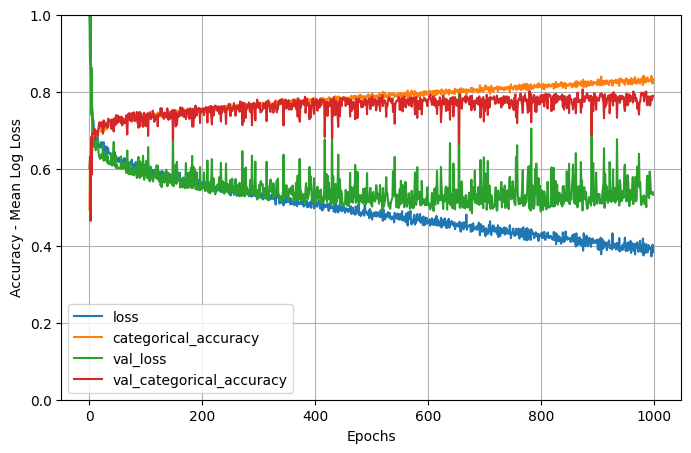

In [130]:
training_history = pd.DataFrame(history.history)
training_history.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0,1]
plt.show()

In [131]:
print(
    "Error (training): ",
    round((1 - training_history.categorical_accuracy.values[-1:][0]) * 100, 1),
    "%",
)
print(
    "Error (development test): ",
    round((1 - training_history.val_categorical_accuracy.values[-1:][0]) * 100, 1),
    "%",
)
print("Time: ", round((time.perf_counter() - start_time)), "seconds")

Error (training):  16.8 %
Error (development test):  21.1 %
Time:  422 seconds


## **Exercises**


### **Exercise 1.**

Performance evaluation Determine the following values: train error, test error (using dev set), bias, variance and training time. Repeat the execution at least three times. Consider 5% as Bayesian error (human error).


In [132]:
human_error = 5
train_errors = [17.7, 9.5, 2.5]
test_errors = [20.2, 21.0, 20.9]
training_times = [203, 1660, 155]
bias = [e - human_error for e in train_errors]
variance = [e - train_errors[i] for i, e in enumerate(test_errors)]

data = {
    "train error": train_errors,
    "test error": test_errors,
    "bias": bias,
    "variance": variance,
    "training time (s)": training_times,
}

values = pd.DataFrame(data)
values

train error  test error  bias  variance  training time (s)
0         17.7        20.2  12.7       2.5                203
1          9.5        21.0   4.5      11.5               1660
2          2.5        20.9  -2.5      18.4                155

### **Exercise 2:**

Changing basic hyperparameters Change hyperparameters related to: batch size, number of layers, and number of neurons. Estimate train error, test error, bias, variance and training time. Consider 5% as Bayesian error (human error).


#### **Change the batch size**


In [11]:
import glob
import pickle

from pydantic import BaseModel
import typing


class ResultsModel(BaseModel):
    batch_size: typing.Optional[int] = 0
    n: typing.Optional[float] = 0
    train_error: typing.Optional[float] = 0
    test_error: typing.Optional[float] = 0
    bias: typing.Optional[float] = 0
    variance: typing.Optional[float] = 0
    total_time: float
    history: typing.Any
    layer: typing.Optional[list] = []
    activation_function: typing.Optional[str] = None
    initializer: typing.Optional[str] = None


class ResultsManager:
    def __init__(self, base_path: str, prefix: str, human_error: int = 5):
        self.human_error = human_error
        self.base_path = base_path
        self.prefix = prefix

    def save_result(self, file_name: str, results_model: ResultsModel):
        if not isinstance(data, dict):
            raise Exception("Data is not a dictionary")
        with open(f"{self.base_path}{file_name}", "wb") as fp:
            pickle.dump(results_model, fp)

    def get_result(self, file_name: str) -> ResultsModel:
        with open(file_name, "rb") as fp:
            data = pickle.load(fp)
            data["history"] = pd.DataFrame(data["history"])
            return ResultsModel(**data)

    def calculate_parameters(self, file_name: str):
        data = self.get_result(file_name)
        train_error = round(
            (1 - data.history.categorical_accuracy.values[-1:][0]) * 100, 1
        )
        test_error = round(
            (1 - data.history.val_categorical_accuracy.values[-1:][0]) * 100, 1
        )
        bias = train_error - self.human_error
        variance = test_error - train_error
        n = (n_train / batch_size) * n_epochs

        data.train_error = train_error
        data.test_error = test_error
        data.bias = bias
        data.variance = variance
        data.n = n

        return data

    def get_all_logs_names(self):
        file_names = glob.glob(f"{self.base_path}{self.prefix}*")
        return file_names

    def get_all_results(self):
        self.results = list()
        for log_name in self.get_all_logs_names():
            self.results.append(self.calculate_parameters(log_name))

        data = {
            "batch size": [r.batch_size for r in self.results],
            "N": [r.n for r in self.results],
            "train error": [r.train_error for r in self.results],
            "test error": [r.test_error for r in self.results],
            "bias": [r.bias for r in self.results],
            "variance": [r.variance for r in self.results],
            "training time (s)": [r.total_time for r in self.results],
            "layer": [r.layer for r in self.results],
            "activation_function": [r.activation_function for r in self.results],
            "initializer": [r.initializer for r in self.results],
        }

        values = pd.DataFrame(data)
        return values.sort_values(by=["batch size"], ascending=False)

    def build_plot_label(self, result: ResultsModel):
        label = ",".join(
            [
                f"{key}:{data}"
                for key, data in result.model_dump(
                    exclude=[
                        "history",
                        "n",
                        "train_error",
                        "test_error",
                        "bias",
                        "variance",
                        "total_time",
                        "history",
                    ]
                ).items()
            ]
        )
        return label

    def plot_results(self):
        fig = plt.figure(figsize=(25, 50))

        self.results.sort(key=lambda r: r.batch_size)

        for i, result in enumerate(self.results):
            ax = fig.add_subplot(len(self.results), 2, i + 1)
            result.history.plot(ax=ax)
            ax.grid(True)
            ax.set_xlabel("Epochs")
            ax.set_ylabel("Accuracy - Mean Log Loss")
            ax.set_title(self.build_plot_label(result))
            ax.set_ylim(0, 1)
        plt.tight_layout()
        plt.show()


def calc_time(start_time):
    total_time = round((time.perf_counter() - start_time))
    return total_time

In [17]:
n_neurons_per_hidden_layer = [500, 250, 75, 25]
batch_sizes = [64, 128, 256, 512, 1024, 2048, 4096, 8192, 16342]
learning_rate = 0.1
n_epochs = 1000

models = list()

for batch_size in batch_sizes:
    model = keras.Sequential(name="my_model")

    model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
    for neurons in n_neurons_per_hidden_layer:
        model.add(keras.layers.Dense(neurons, activation="relu"))
    model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

    model.compile(
        loss=tf.keras.losses.categorical_crossentropy,
        optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
        metrics=["categorical_accuracy"],
    )
    models.append(model)

In [18]:
LOG_PREFIX = "batch_size_"

rm = ResultsManager(base_path="exercise2/batch_size/", prefix=LOG_PREFIX)

data = dict()

for index, batch_size in enumerate(batch_sizes):
    start_time = time.perf_counter()

    history = models[index].fit(
        x_train,
        t_train,
        batch_size=batch_size,
        epochs=n_epochs,
        verbose=0,
        validation_data=(x_dev, t_dev),
    )

    total_time = calc_time(start_time)

    data = {
        "history": history.history,
        "batch_size": batch_size,
        "total_time": total_time,
        "n_epochs": n_epochs,
    }
    rm.save_result(f"{LOG_PREFIX}{batch_size}", data)

In [196]:
rm.get_all_results()

batch size            N  train error  test error  bias  variance  \
0         512  31917.96875         15.0        21.8  10.0       6.8   
1         512  31917.96875         21.7        23.7  16.7       2.0   
2         512  31917.96875         24.7        27.5  19.7       2.8   
3         512  31917.96875         21.0        23.0  16.0       2.0   
4         512  31917.96875         16.6        26.4  11.6       9.8   

   training time (s)                     layer  
0              732.0  [1000, 500, 250, 75, 25]  
1              383.0                  [75, 25]  
2              366.0                      [25]  
3              400.0             [250, 75, 25]  
4              470.0        [500, 250, 75, 25]

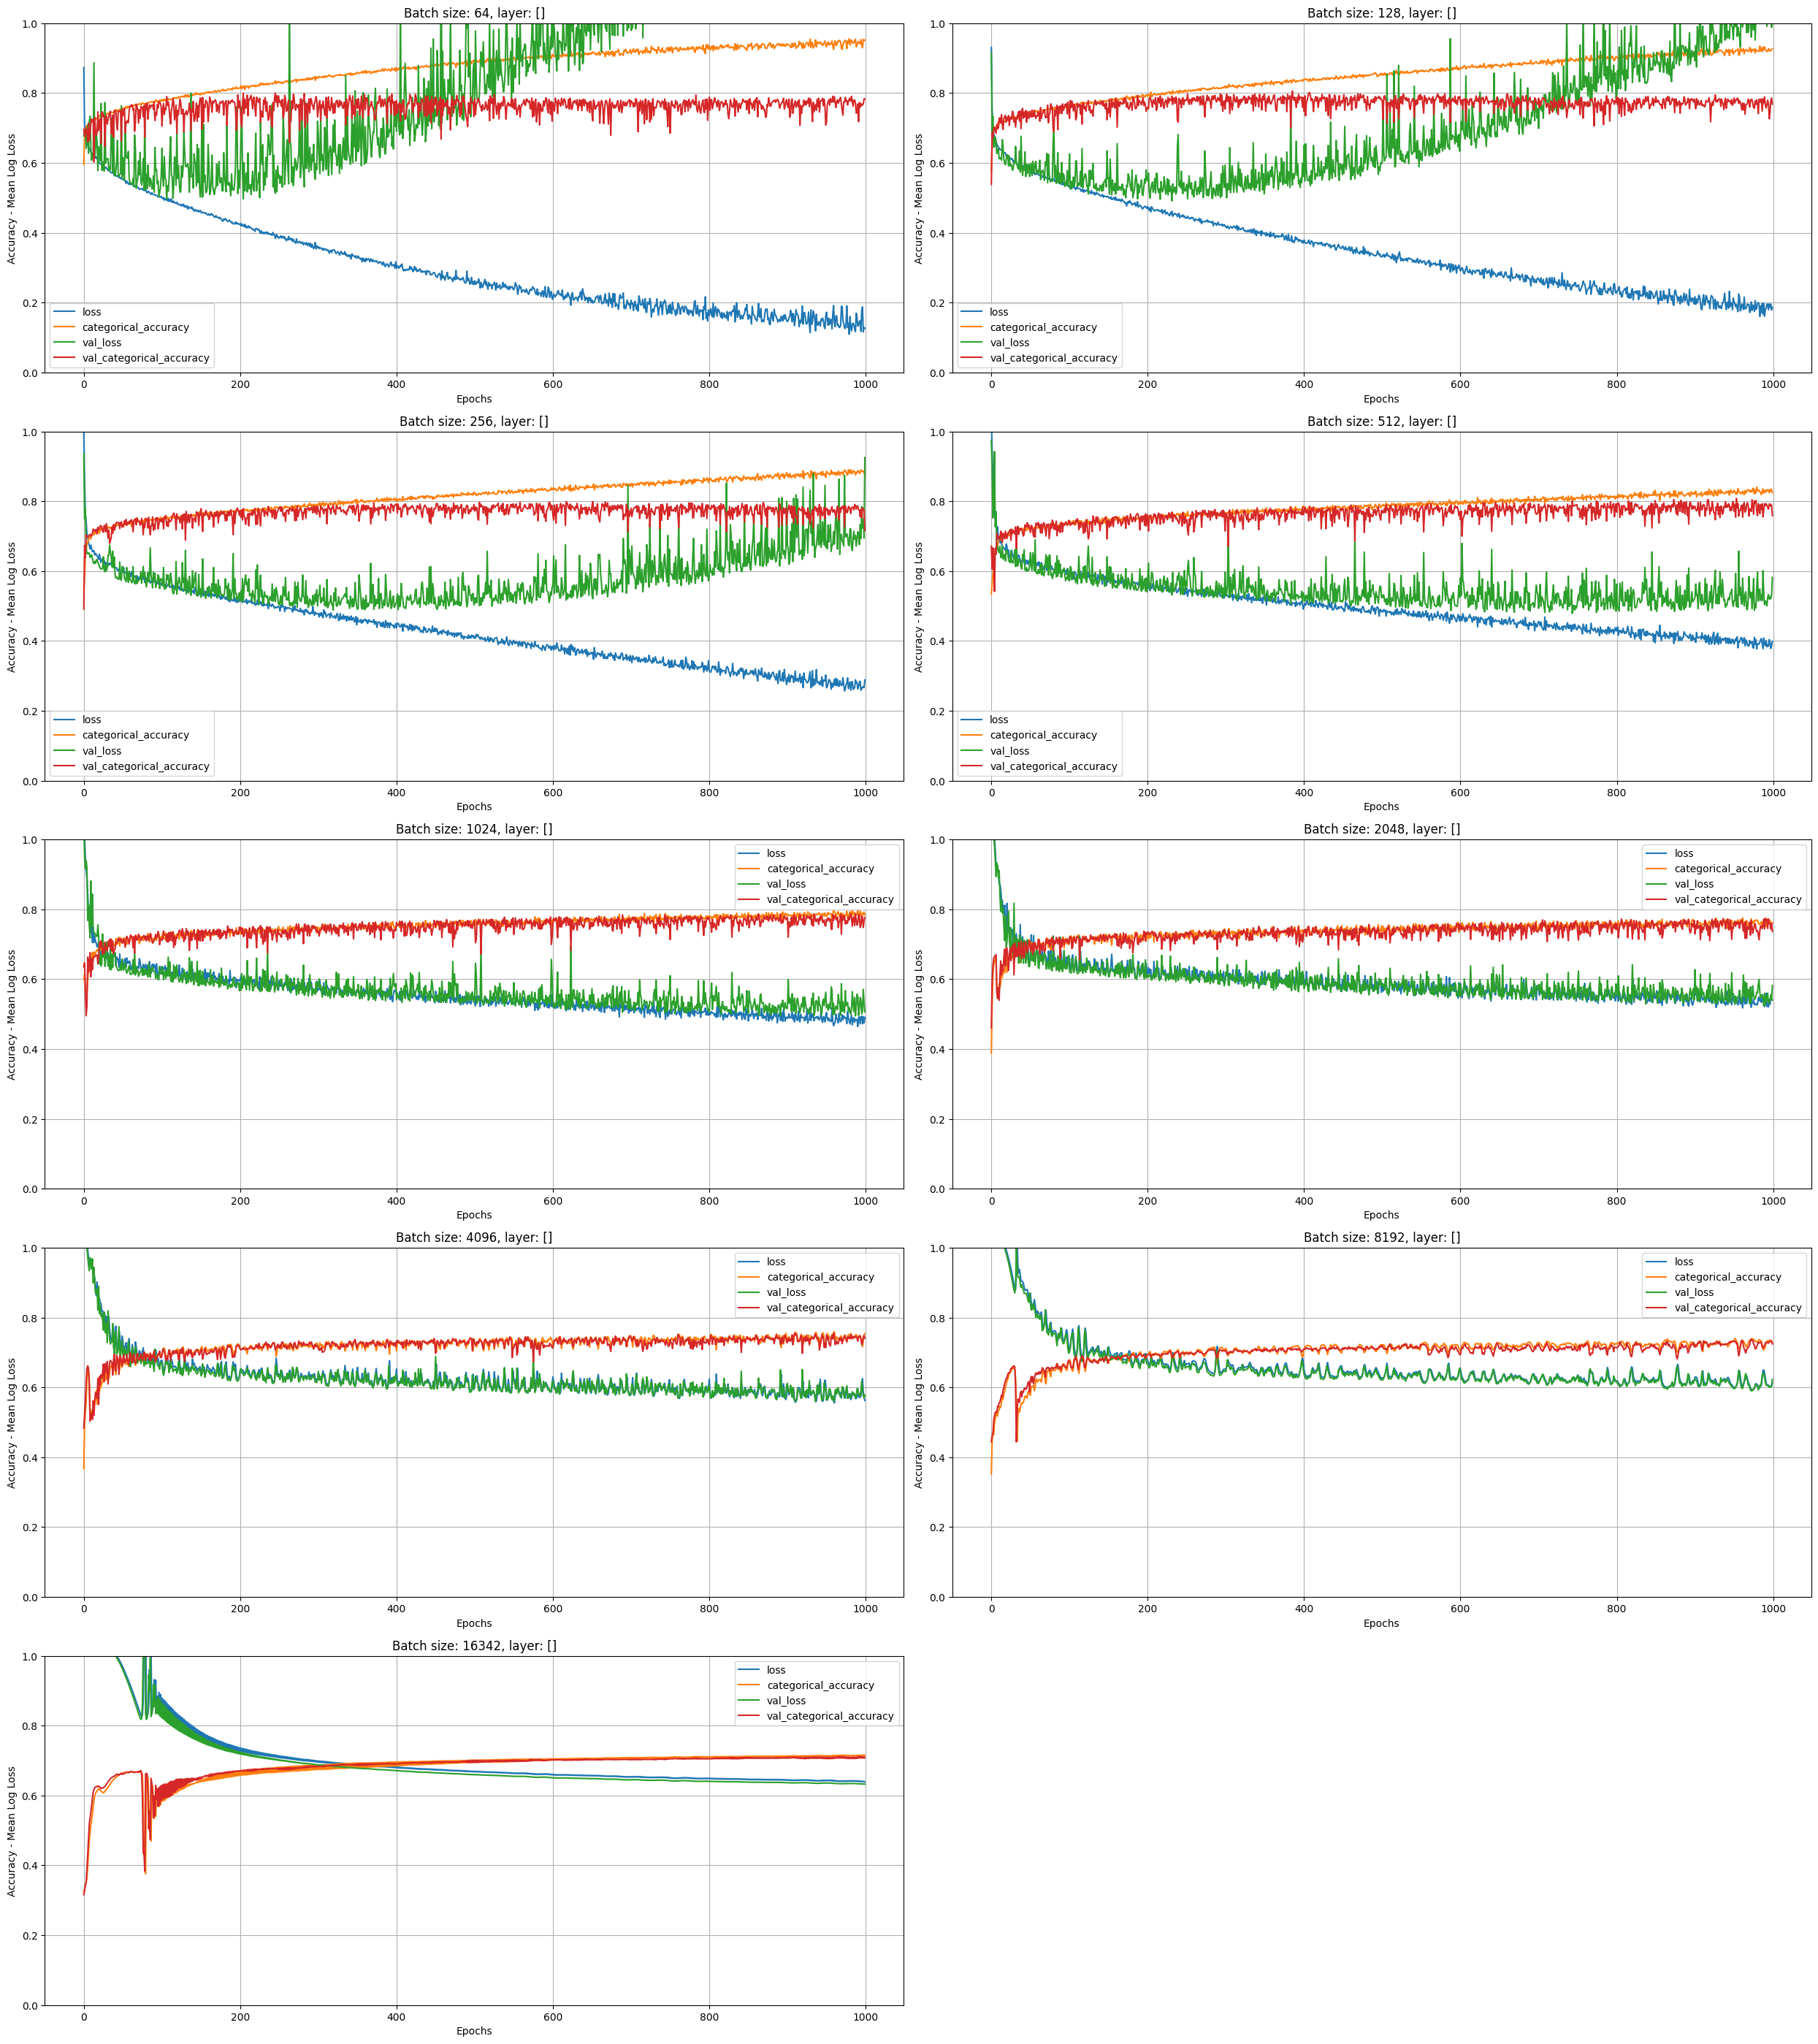

In [189]:
rm.plot_results()

#### **Change the number of layers**


In [7]:
n_neurons_per_hidden_layers = [
    [1000, 500, 250, 75, 25],
    [500, 250, 75, 25],
    [250, 75, 25],
    [75, 25],
    [25],
]
batch_size = 512
learning_rate = 0.1
n_epochs = 1000

models = list()

for layers in n_neurons_per_hidden_layers:
    model = keras.Sequential(name="my_model")

    model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
    for neurons in layers:
        model.add(keras.layers.Dense(neurons, activation="relu"))
    model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

    model.compile(
        loss=tf.keras.losses.categorical_crossentropy,
        optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
        metrics=["categorical_accuracy"],
    )
    models.append(model)

2023-10-27 22:05:48.646851: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 22:05:48.653606: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 22:05:48.653957: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 22:05:48.655517: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-27 22:05:48.655817: I tensorflow/compile

In [8]:
LOG_PREFIX = "layer_size_"

rm = ResultsManager(base_path="exercise2/layer_size/", prefix=LOG_PREFIX)

data = dict()

for index, layer in enumerate(n_neurons_per_hidden_layers):
    start_time = time.perf_counter()

    history = models[index].fit(
        x_train,
        t_train,
        batch_size=batch_size,
        epochs=n_epochs,
        verbose=0,
        validation_data=(x_dev, t_dev),
    )

    total_time = calc_time(start_time)

    data = {
        "history": history.history,
        "batch_size": batch_size,
        "total_time": total_time,
        "n_epochs": n_epochs,
        "layer": layer,
    }
    rm.save_result(f"{LOG_PREFIX}{str(layer)}", data)

2023-10-27 22:05:56.530620: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-27 22:05:56.631323: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f54acd58c20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-27 22:05:56.631410: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1050 Ti, Compute Capability 6.1
2023-10-27 22:05:56.642155: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-10-27 22:05:56.678963: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


KeyboardInterrupt: 

In [193]:
rm.get_all_results()

batch size            N  train error  test error  bias  variance  \
0         512  31917.96875         15.0        21.8  10.0       6.8   
1         512  31917.96875         21.7        23.7  16.7       2.0   
2         512  31917.96875         24.7        27.5  19.7       2.8   
3         512  31917.96875         21.0        23.0  16.0       2.0   
4         512  31917.96875         16.6        26.4  11.6       9.8   

   training time (s)                     layer  
0              732.0  [1000, 500, 250, 75, 25]  
1              383.0                  [75, 25]  
2              366.0                      [25]  
3              400.0             [250, 75, 25]  
4              470.0        [500, 250, 75, 25]

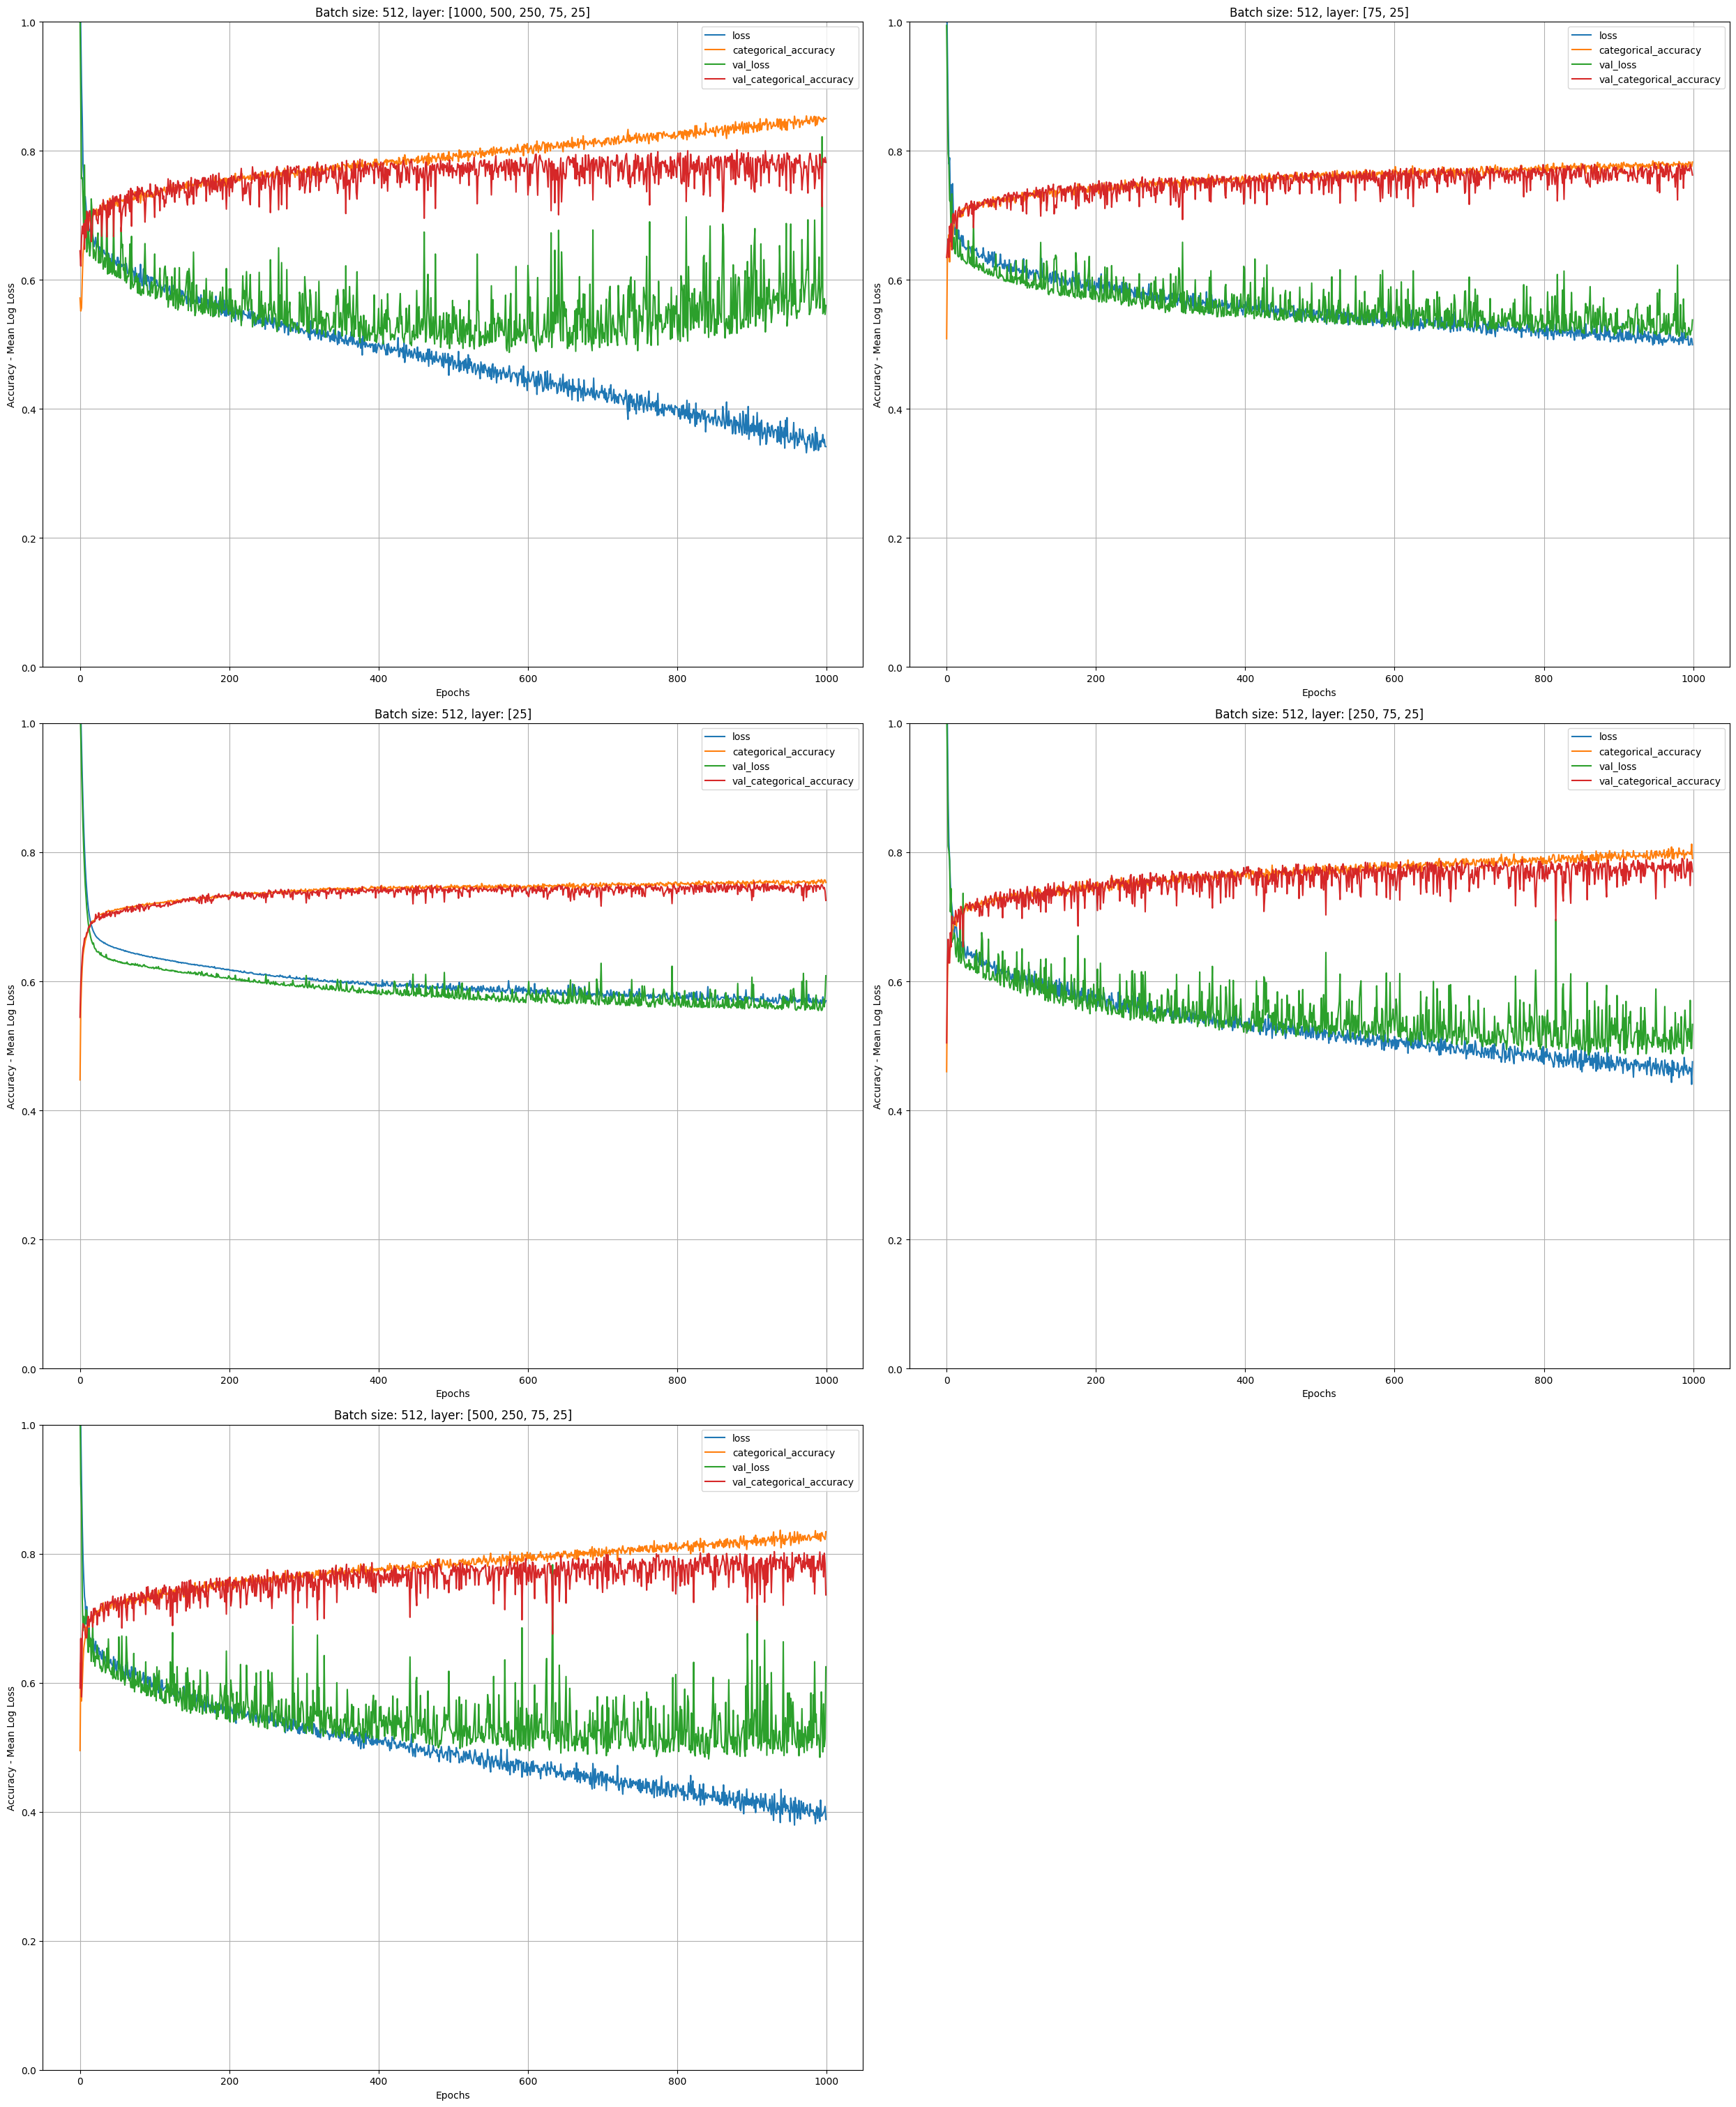

In [197]:
rm.plot_results()

## Exercise 3: Changing activation functions

Change the activation function in the following part of the code:

```
for neurons in n_neurons_per_hlayer:
   model.add(keras.layers.Dense(neurons, activation="relu")
```

Possible activation functions: elu, relu, tanh, linear


In [15]:
n_neurons_per_hidden_layer = [500, 250, 75, 25]
activation_functions = ["elu", "relu", "tanh", "sigmoid", "softmax"]
batch_size = 512
learning_rate = 0.1
n_epochs = 1000

models = list()

for activation_function in activation_functions:
    model = keras.Sequential(name="my_model")

    model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
    for neurons in n_neurons_per_hidden_layer:
        model.add(keras.layers.Dense(neurons, activation=activation_function))
    model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

    model.compile(
        loss=tf.keras.losses.categorical_crossentropy,
        optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
        metrics=["categorical_accuracy"],
    )
    models.append(model)

In [16]:
LOG_PREFIX = "activation_function_"

rm = ResultsManager(base_path="exercise3/", prefix=LOG_PREFIX)

data = dict()

for index, activation_function in enumerate(activation_functions):
    start_time = time.perf_counter()

    history = models[index].fit(
        x_train,
        t_train,
        batch_size=batch_size,
        epochs=n_epochs,
        verbose=0,
        validation_data=(x_dev, t_dev),
    )

    total_time = calc_time(start_time)

    data = {
        "history": history.history,
        "batch_size": batch_size,
        "total_time": total_time,
        "n_epochs": n_epochs,
        "layer": n_neurons_per_hidden_layer,
        "activation_function": activation_function,
    }
    rm.save_result(f"{LOG_PREFIX}{str(activation_function)}", data)

In [ ]:
LOG_PREFIX = "activation_function_"

rm = ResultsManager(base_path="exercise3/", prefix=LOG_PREFIX)
rm.get_all_results()

batch size            N  train error  test error  bias  variance  \
0         512  31917.96875         17.0        21.5  12.0       4.5   
1         512  31917.96875         20.8        23.1  15.8       2.3   
2         512  31917.96875         66.8        67.2  61.8       0.4   
3         512  31917.96875         18.3        21.2  13.3       2.9   
4         512  31917.96875         28.7        28.6  23.7      -0.1   

   training time (s)               layer activation_function  
0              642.0  [500, 250, 75, 25]                relu  
1              614.0  [500, 250, 75, 25]                 elu  
2              373.0  [500, 250, 75, 25]             softmax  
3              689.0  [500, 250, 75, 25]                tanh  
4              344.0  [500, 250, 75, 25]             sigmoid

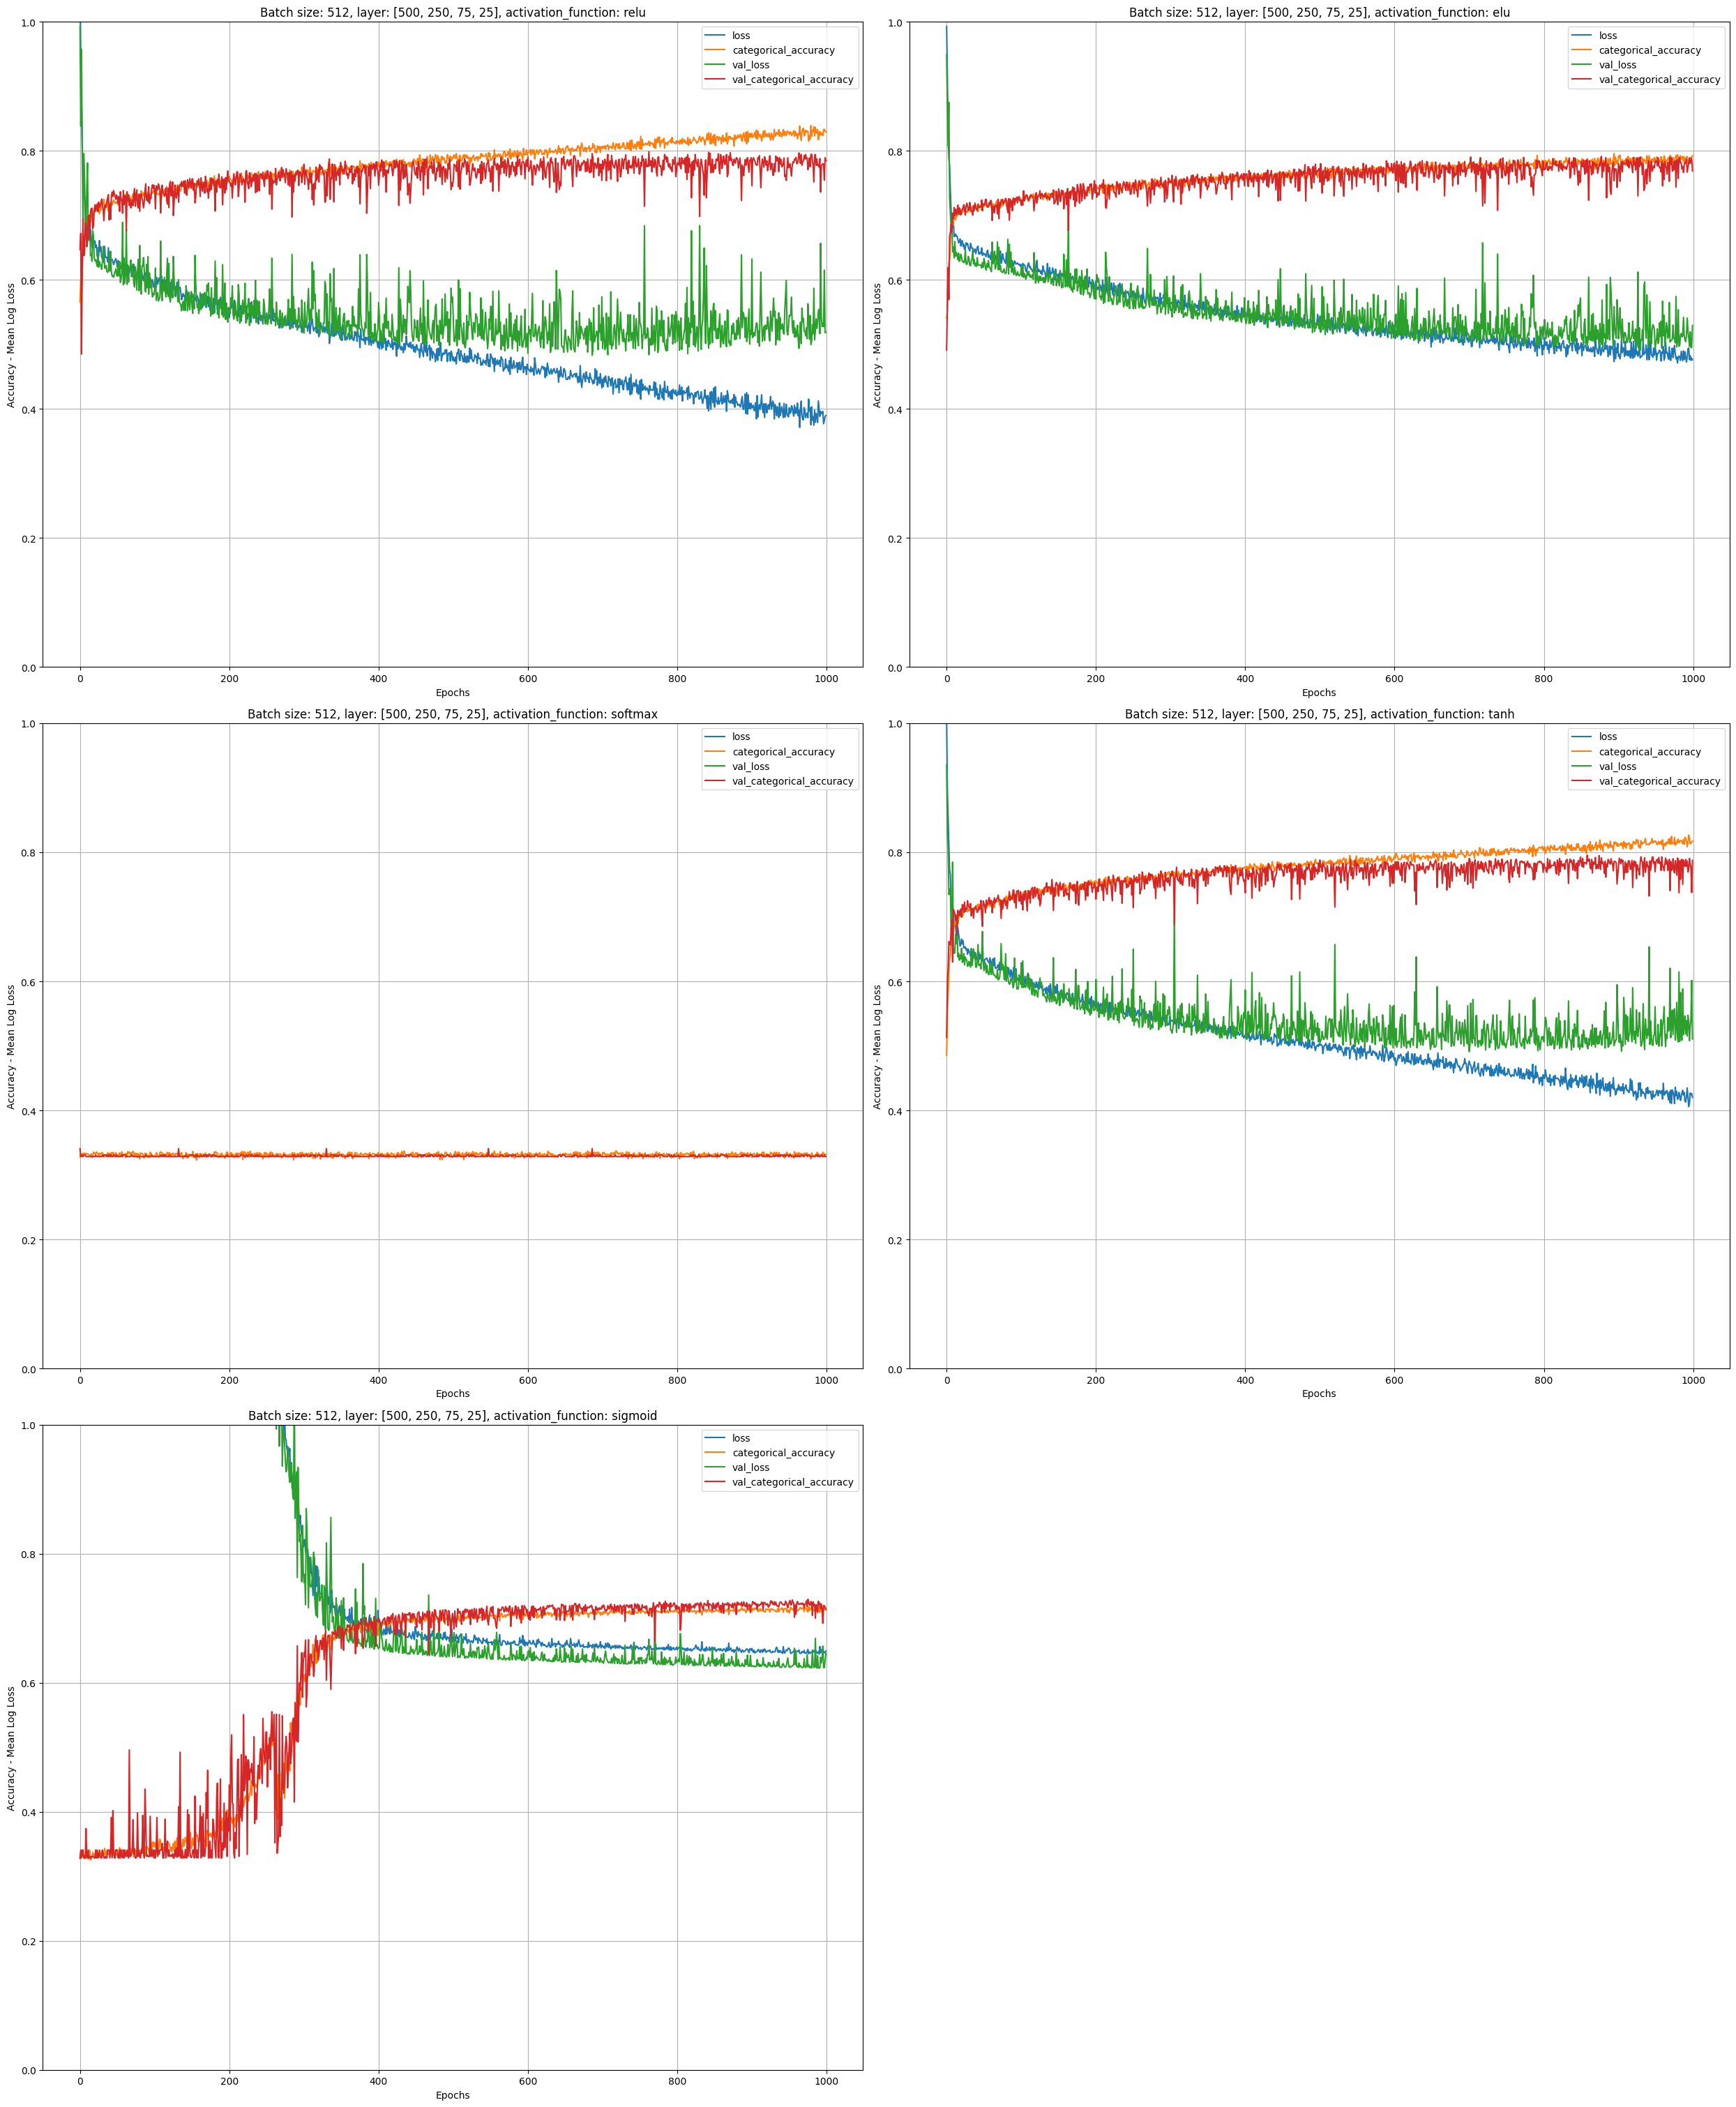

In [18]:
rm.plot_results()

## Exercise 4: Changing initializers

Change the lines:

```
my_initializer= keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)
for neurons in n_neurons_per_hidden_layer:
    model.add(keras.layers.Dense(neurons, activation="relu", kernel_initializer=my_initializer))
```

Possible initializers:

```
keras.initializers.Zeros()
keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
keras.initializers.he_uniform(seed=None)
keras.initializers.he_normal(seed=None)
```


In [36]:
n_neurons_per_hidden_layer = [500, 250, 75, 25]
batch_size = 512
learning_rate = 0.1
n_epochs = 1000

initializers = {
    "zeros": keras.initializers.Zeros(),
    "randomUniform": keras.initializers.RandomUniform(
        minval=-0.05, maxval=0.05, seed=None
    ),
    "randomNormal": keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None),
    "he_uniform": keras.initializers.he_uniform(seed=None),
    "he_normal": keras.initializers.he_normal(seed=None),
}


models = list()

for initializer in initializers:
    model = keras.Sequential(name="my_model")

    model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
    for neurons in n_neurons_per_hidden_layer:
        model.add(
            keras.layers.Dense(
                neurons, activation="relu", kernel_initializer=initializers[initializer]
            )
        )
    model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

    model.compile(
        loss=tf.keras.losses.categorical_crossentropy,
        optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
        metrics=["categorical_accuracy"],
    )
    models.append(model)

/home/javi/miniconda3/envs/gpu/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/home/javi/miniconda3/envs/gpu/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/home/javi/miniconda3/envs/gpu/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being call

In [37]:
LOG_PREFIX = "inicialization_"

rm = ResultsManager(base_path="exercise4/", prefix=LOG_PREFIX)

data = dict()

for index, initializer in enumerate(initializers):
    start_time = time.perf_counter()

    history = models[index].fit(
        x_train,
        t_train,
        batch_size=batch_size,
        epochs=n_epochs,
        verbose=0,
        validation_data=(x_dev, t_dev),
    )

    total_time = calc_time(start_time)

    data = {
        "history": history.history,
        "batch_size": batch_size,
        "total_time": total_time,
        "n_epochs": n_epochs,
        "layer": n_neurons_per_hidden_layer,
        "initializer": initializer,
    }
    rm.save_result(f"{LOG_PREFIX}{str(initializer)}", data)

In [13]:
LOG_PREFIX = "inicialization_"
rm = ResultsManager(base_path="exercise4/", prefix=LOG_PREFIX)
rm.get_all_results()

batch size            N  train error  test error  bias  variance  \
0         512  31917.96875         66.9        67.2  61.9       0.3   
1         512  31917.96875         14.3        22.2   9.3       7.9   
2         512  31917.96875         20.2        21.6  15.2       1.4   
3         512  31917.96875         18.3        22.2  13.3       3.9   
4         512  31917.96875         14.7        22.6   9.7       7.9   

   training time (s)               layer activation_function    initializer  
0              352.0  [500, 250, 75, 25]                None          zeros  
1              333.0  [500, 250, 75, 25]                None     he_uniform  
2              339.0  [500, 250, 75, 25]                None  randomUniform  
3              335.0  [500, 250, 75, 25]                None   randomNormal  
4              332.0  [500, 250, 75, 25]                None      he_normal

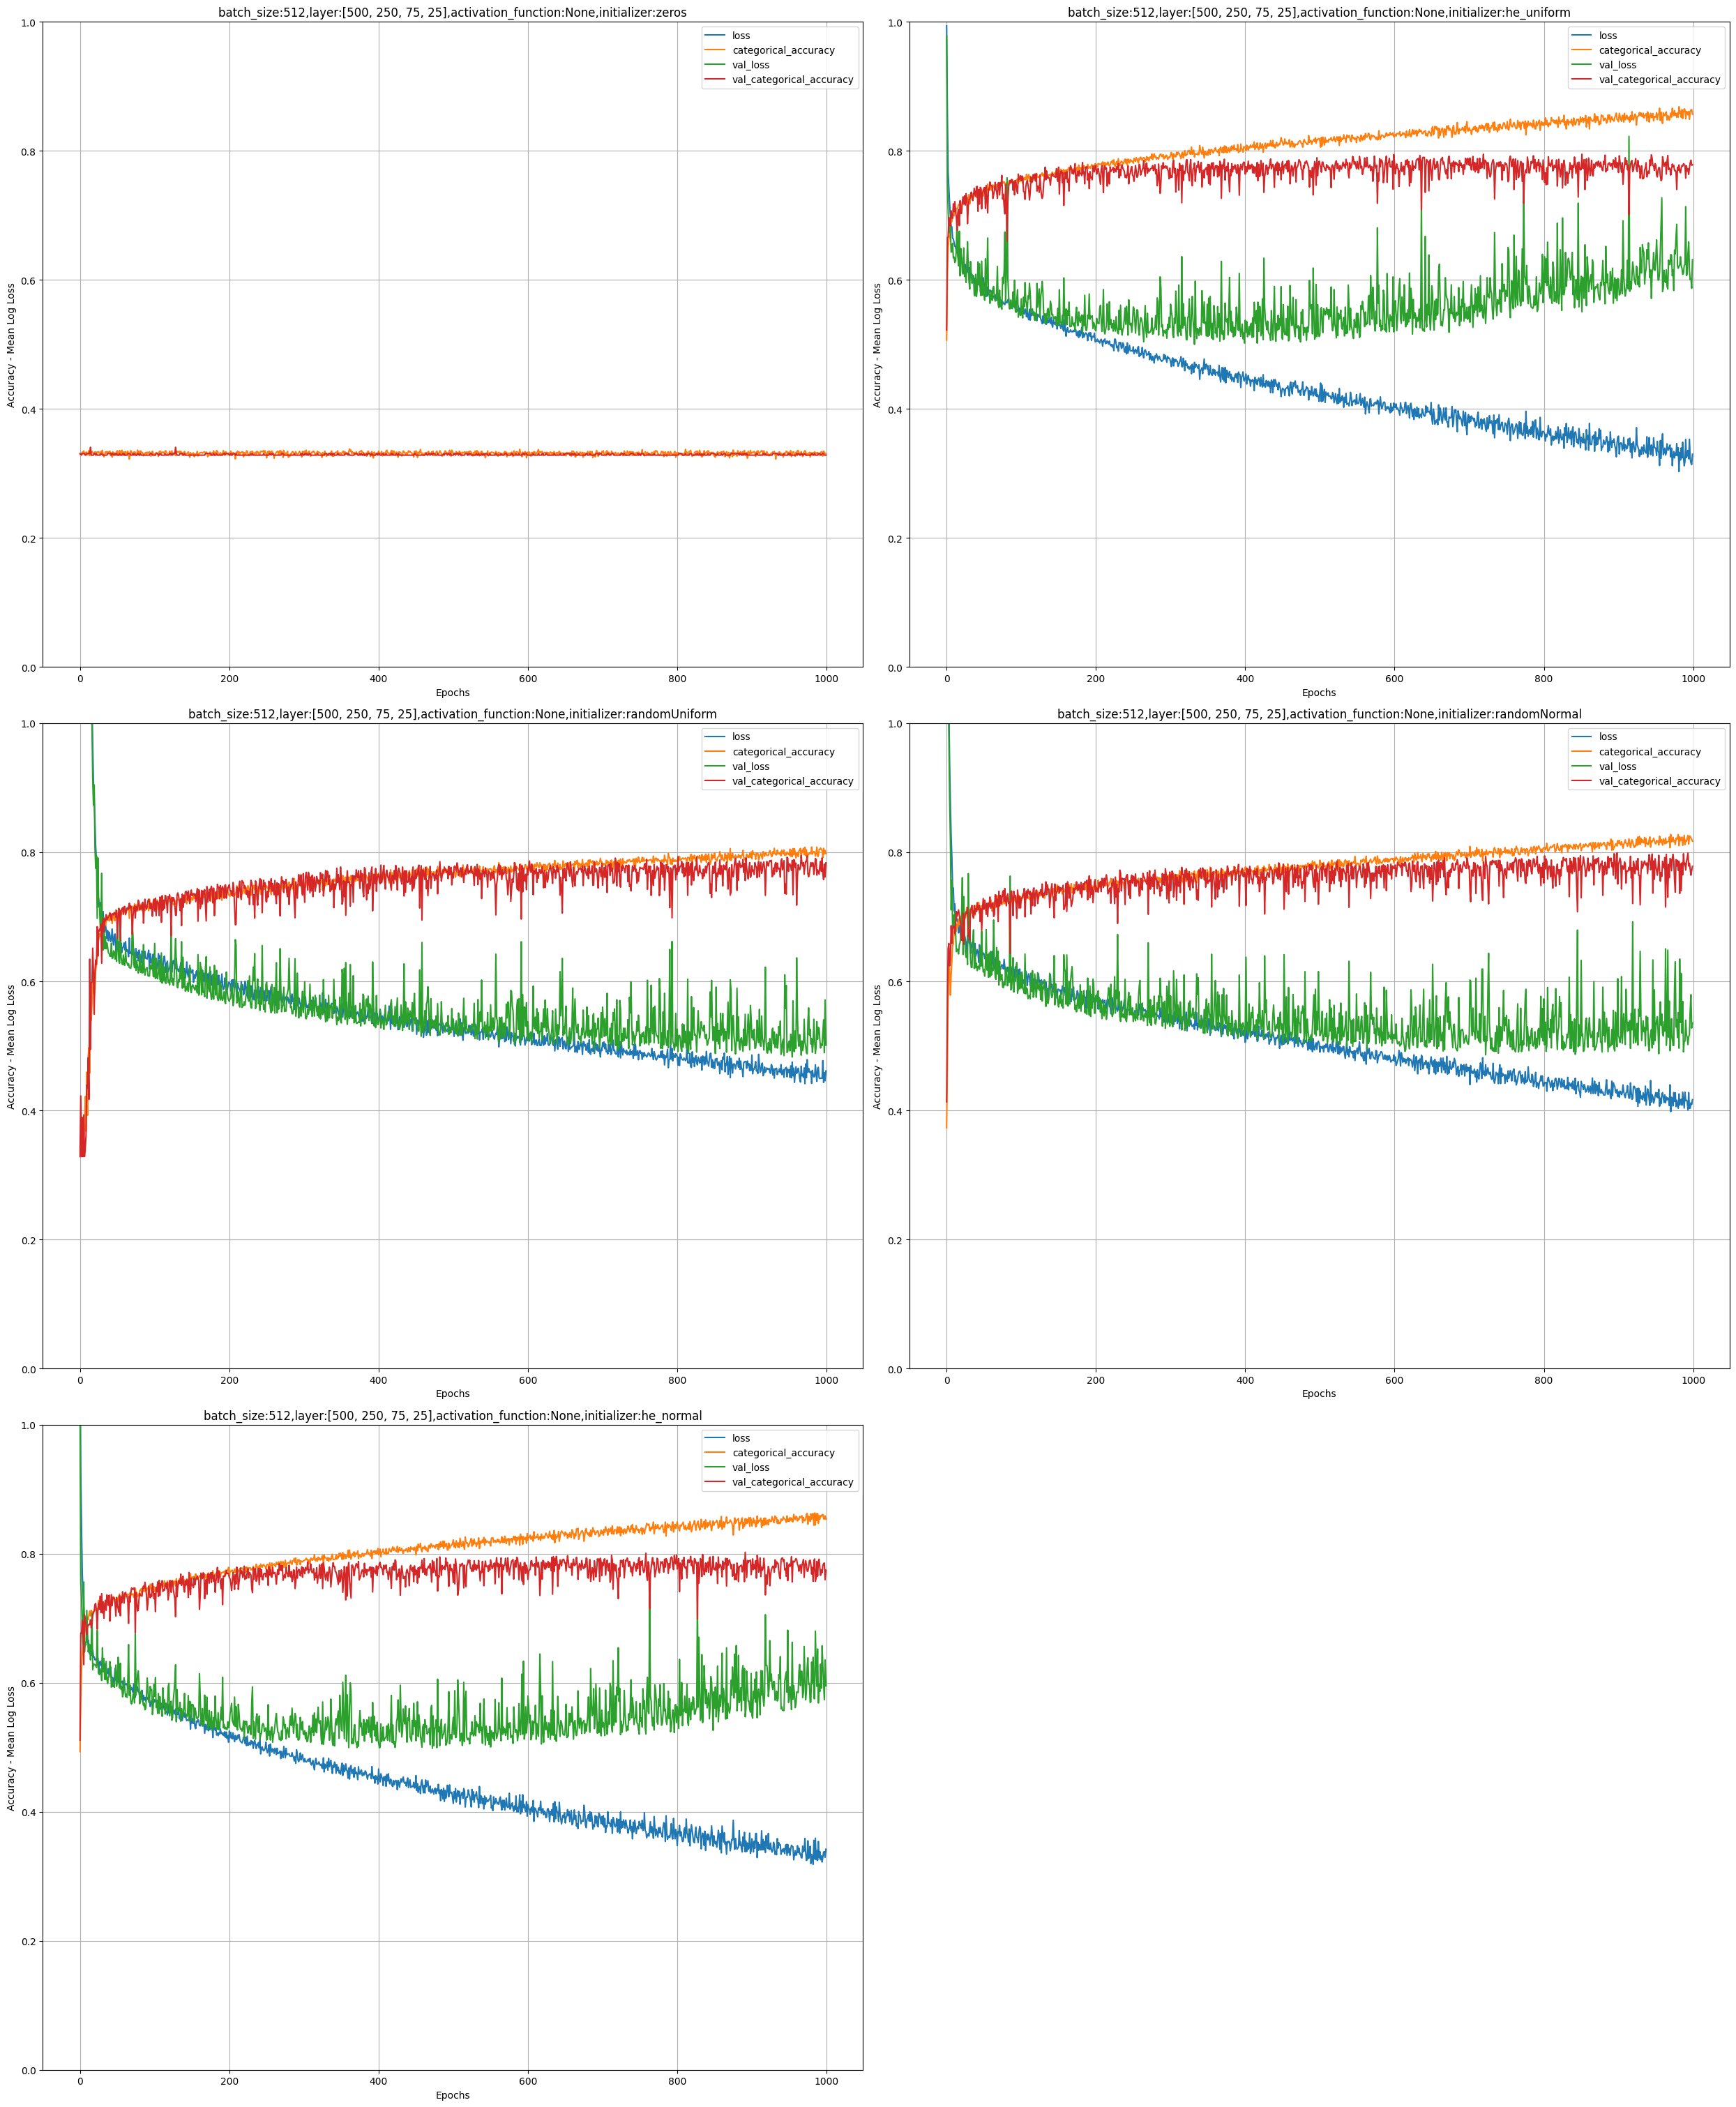

In [14]:
rm.plot_results()